In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

45

In [5]:
import requests
requests.__version__

'2.26.0'

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Above code replaces the following
# Loop through all the cities in our list.
# for i in range(len(cities)):

    #Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chom bung
City not found. Skipping...
Processing Record 2 of Set 1 | toliary
City not found. Skipping...
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | havoysund
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | zhigansk
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | komsomolskiy
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | qibili
City n

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Havoysund,70.9963,24.6622,27.48,69,100,38.65,NO,2022-01-24 15:52:36
1,Ushuaia,-54.8000,-68.3000,51.42,66,75,13.80,AR,2022-01-24 15:51:18
2,Zhigansk,66.7697,123.3711,-16.19,100,95,1.19,RU,2022-01-24 15:52:36
3,Ponta Do Sol,32.6667,-17.1000,66.00,77,91,5.84,PT,2022-01-24 15:52:37
4,Port Alfred,-33.5906,26.8910,75.67,74,5,8.97,ZA,2022-01-24 15:52:37
5,Busselton,-33.6500,115.3333,62.10,77,2,10.80,AU,2022-01-24 15:51:26
6,Hithadhoo,-0.6000,73.0833,81.86,72,84,11.81,MV,2022-01-24 15:51:19
7,Atuona,-9.8000,-139.0333,77.99,77,9,17.87,PF,2022-01-24 15:51:25
8,Komsomolskiy,40.4272,71.7189,33.22,69,45,4.61,UZ,2022-01-24 15:52:38
9,Saskylakh,71.9167,114.0833,-10.75,95,97,5.06,RU,2022-01-24 15:52:38


In [11]:
# Reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Havoysund,NO,2022-01-24 15:52:36,70.9963,24.6622,27.48,69,100,38.65
1,Ushuaia,AR,2022-01-24 15:51:18,-54.8000,-68.3000,51.42,66,75,13.80
2,Zhigansk,RU,2022-01-24 15:52:36,66.7697,123.3711,-16.19,100,95,1.19
3,Ponta Do Sol,PT,2022-01-24 15:52:37,32.6667,-17.1000,66.00,77,91,5.84
4,Port Alfred,ZA,2022-01-24 15:52:37,-33.5906,26.8910,75.67,74,5,8.97


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

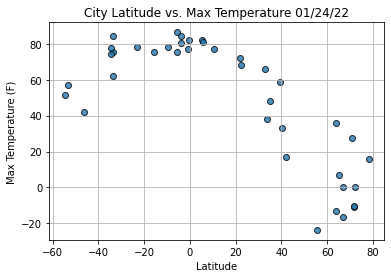

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

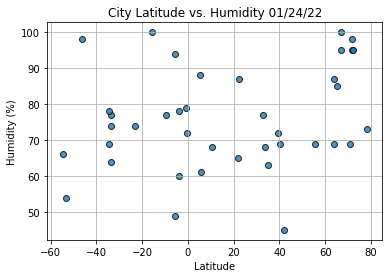

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

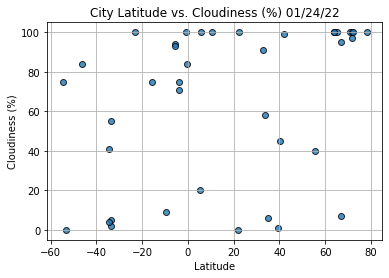

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

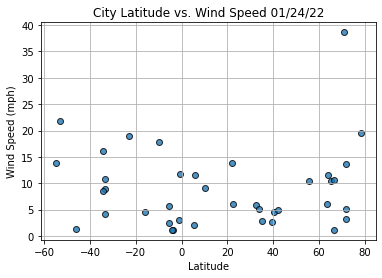

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    from textwrap import wrap
    title = title
    plt.title('\n'.join(wrap(title,50)), fontsize=14)
    # plt.title(title)
    plt.xlabel('Latitude', fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                        Tiksi
Country                        RU
Date          2022-01-24 15:52:39
Lat                       71.6872
Lng                      128.8694
Max Temp                   -10.43
Humidity                       98
Cloudiness                    100
Wind Speed                   3.24
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

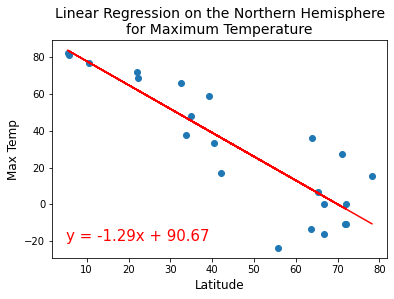

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature", 'Max Temp',(5,-20))

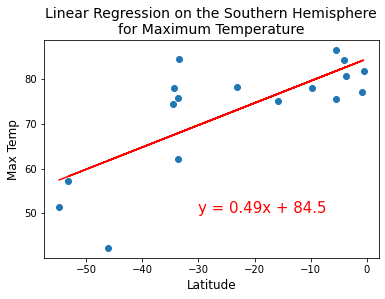

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature", 'Max Temp',(-30,50))

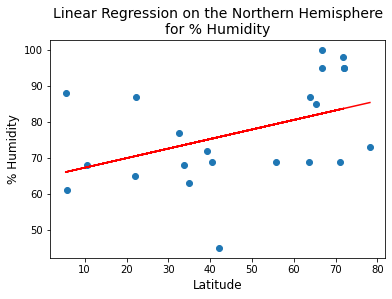

In [23]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,40))

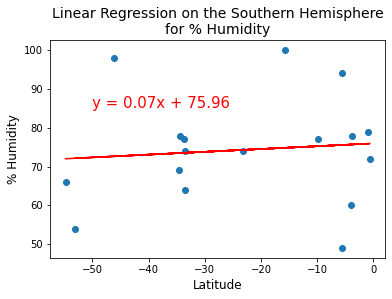

In [24]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,85))

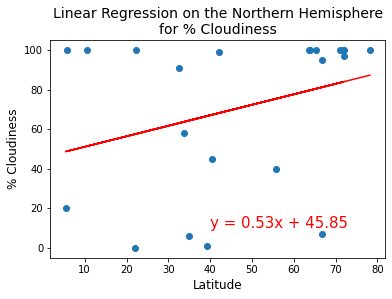

In [25]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

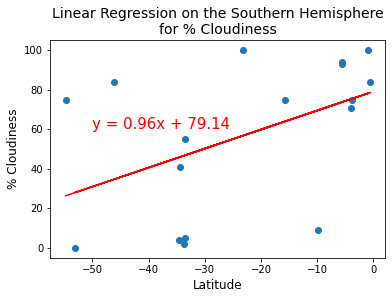

In [26]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

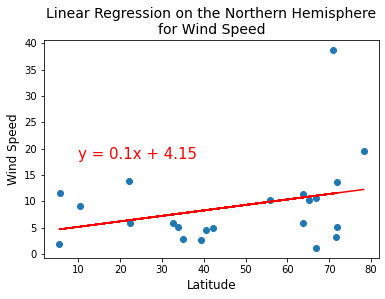

In [27]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,18))

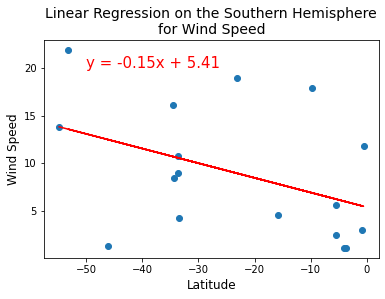

In [28]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))